# DAB200 -- Lab 7

In this lab, you will gain further experience in dealing with missing data and further practice converting non-numeric features in a dataset to numeric, as well as, exploring ways to increase model performance through data set improvement.

**Target**: `Comb Unadj FE - Conventional Fuel`

### Part 0


 - **<u>Group Number:</u>** 20
 - **<u>Group Members:</u>**<br>
 Pallavi Ravikumar Menon<br>
 Akshara Santhosh

     

### Part 1: Initial data clean-up



In [1]:
#importing libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from rfpimp import *
from pandas.api.types import is_string_dtype, is_object_dtype
import category_encoders as ce
import warnings
warnings.filterwarnings('ignore')

C:\Users\palla\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#reading the data
df = pd.read_csv("C:/Users/palla/OneDrive/Desktop/ML_notebooks/Lab7/vehicles_2018.csv")
df.head().T

,0,1,2,3,4
Model Year,2018,2018,2018,2018,2018
Mfr Name,aston martin,aston martin,aston martin,aston martin,BMW
Division,Aston Martin Lagonda Ltd,Aston Martin Lagonda Ltd,Aston Martin Lagonda Ltd,Aston Martin Lagonda Ltd,Mini
Carline,DB11 V12,DB11 V8,"Vanquish, S and Zagato",Rapide S,COOPER CLUBMAN
Verify Mfr Cd,ASX,ASX,ASX,ASX,BMX
...,...,...,...,...,...
120V Charge time at 120 Volts (hours),NaN,NaN,NaN,NaN,NaN
PHEV Total Driving Range (rounded to nearest 10 miles)DISTANCE,NaN,NaN,NaN,NaN,NaN
City PHEV Composite MPGe,NaN,NaN,NaN,NaN,NaN
Hwy PHEV Composite MPGe,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Columns: 162 entries, Model Year to Comb PHEV Composite MPGe
dtypes: float64(79), int64(18), object(65)
memory usage: 1.6+ MB


In [4]:
X=df.drop('Comb Unadj FE - Conventional Fuel',axis=1)
X.head(3)

,Model Year,Mfr Name,Division,Carline,Verify Mfr Cd,Index (Model Type Index),Eng Displ,# Cyl,Transmission,City FE (Guide) - Conventional Fuel,...,City CO2 Rounded Adjusted,Hwy CO2 Rounded Adjusted,Comb CO2 Rounded Adjusted (as shown on FE Label),CO2-PHEV Composite Rounded Adjusted Combined CO2,240V Charge Time at 240 volts (hours),120V Charge time at 120 Volts (hours),PHEV Total Driving Range (rounded to nearest 10 miles)DISTANCE,City PHEV Composite MPGe,Hwy PHEV Composite MPGe,Comb PHEV Composite MPGe
0,2018,aston martin,Aston Martin Lagonda Ltd,DB11 V12,ASX,1,5.2,12,Auto(S8),15,...,579,397,497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,aston martin,Aston Martin Lagonda Ltd,DB11 V8,ASX,2,4.0,8,Auto(S8),18,...,486,365,431,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,aston martin,Aston Martin Lagonda Ltd,"Vanquish, S and Zagato",ASX,4,6.0,12,Auto(S8),13,...,659,428,555,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
def showimp(rf, X, y):
    features = list(X.columns)
    I = importances(rf, X, y, features=features)
    plt.figure(figsize=(10,5))
    plot_importances(I, color='#4575b4')

In [6]:
#removing the target related features 
X.columns = map(str.lower, X.columns)
X = X[X.columns.drop(list(X.filter(regex='fuel costs')))]
X= X[X.columns.drop(list(X.filter(regex='rating')))]
X= X[X.columns.drop(list(X.filter(regex='mpg')))]
X= X[X.columns.drop(list(X.filter(regex='co2')))]
X= X[X.columns.drop(list(X.filter(regex='date')))]
X= X[X.columns.drop(list(X.filter(regex='ghg')))]
X= X[X.columns.drop(list(X.filter(regex='alternative fuel')))]
X= X[X.columns.drop(list(X.filter(regex='conventional fuel')))]

##### Step 2: Remove features with $\ge$90% missing values



In [7]:
X = X.dropna(thresh=len(X) * .90, axis=1)
X.head(5).T

,0,1,2,3,4
model year,2018,2018,2018,2018,2018
mfr name,aston martin,aston martin,aston martin,aston martin,BMW
division,Aston Martin Lagonda Ltd,Aston Martin Lagonda Ltd,Aston Martin Lagonda Ltd,Aston Martin Lagonda Ltd,Mini
carline,DB11 V12,DB11 V8,"Vanquish, S and Zagato",Rapide S,COOPER CLUBMAN
verify mfr cd,ASX,ASX,ASX,ASX,BMX
index (model type index),1,2,4,5,30
eng displ,5.2,4,6,6,1.5
# cyl,12,8,12,12,3
transmission,Auto(S8),Auto(S8),Auto(S8),Auto(S8),Auto(S6)
air aspiration method desc,Turbocharged,Turbocharged,Naturally Aspirated,Naturally Aspirated,Turbocharged


##### Step 3: Convert all string/object features to lower case


In [8]:
for col in X.columns:
        if is_string_dtype(X[col]) or is_object_dtype(X[col]):
            X[col] = X[col].str.lower()

##### Step 4: Remove any feature with only 1 unique value


In [9]:
X = X[[c for c
        in list(X)
        if len(X[c].unique()) > 1]]

In [10]:
# getting the list of features for numerical and categorical features' name
num_features = [i for i in X.columns if X[i].dtype != 'object']
cat_features = [i for i in X.columns if X[i].dtype == 'object']           

In [11]:
df1=X

In [12]:
X.info(verbose= False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Columns: 36 entries, mfr name to stop/start system (engine management system)  description
dtypes: float64(2), int64(7), object(27)
memory usage: 362.9+ KB


##### Step 5: Compare data sets

Compare some basic characteristics between our original data set and the one after our initial clean up. Fill in the table below:

| Characteristic | Original data set | After initial clean-up |
| :- | :- | :- |  
|  # rows  | 1290    | 1290  | 
|  # columns  |  162   |  36 | 
|  # numeric features |  97   |  9 | 
|  # non-nonumeric features |   65  |  27 | 

### Part 2 - Create and evaluate an initial model


In [13]:
X.head(3)

,mfr name,division,carline,verify mfr cd,index (model type index),eng displ,# cyl,transmission,air aspiration method desc,trans,...,cyl deact?,var valve timing?,var valve timing desc,var valve lift?,fuel metering sys cd,fuel metering sys desc,camless valvetrain (y or n),oil viscosity,stop/start system (engine management system) code,stop/start system (engine management system) description
0,aston martin,aston martin lagonda ltd,db11 v12,asx,1,5.2,12,auto(s8),turbocharged,sa,...,y,y,inlet and exhaust cam phasing,n,mfi,multipoint/sequential fuel injection,n,0w20,n,no
1,aston martin,aston martin lagonda ltd,db11 v8,asx,2,4.0,8,auto(s8),turbocharged,sa,...,n,y,inlet and exhaust cam phasing,n,mfi,multipoint/sequential fuel injection,n,5w40,n,no
2,aston martin,aston martin lagonda ltd,"vanquish, s and zagato",asx,4,6.0,12,auto(s8),naturally aspirated,sa,...,n,y,inlet and exhaust cam phasing,n,mfi,multipoint/sequential fuel injection,n,0w40,n,no


In [14]:
data_num = X[num_features]
data_num.shape

(1290, 9)

In [15]:
catfeatures=X.select_dtypes(include=['object']).copy()
cat=catfeatures.columns
numfeatures=X.select_dtypes(exclude=['object']).columns
X = X[numfeatures]
y = df['Comb Unadj FE - Conventional Fuel']

In [16]:
#fill in any missing values with 0
X = X.fillna(0)
X.head(3)

,index (model type index),eng displ,# cyl,# gears,max ethanol % - gasoline,intake valves per cyl,exhaust valves per cyl,carline class,epa fe label dataset id
0,1,5.2,12,8,10.0,2,2,2,23856
1,2,4.0,8,8,10.0,2,2,2,23857
2,4,6.0,12,8,10.0,2,2,2,22886


In [17]:
## Creating and evaluating the model
oob_r2_baseline = []
for i in range(10):
    rf = RandomForestRegressor(n_estimators=150, n_jobs=-1, oob_score=True)
    rf.fit(X,y)
    #Calculating Oob score for Baseline model
    oob_baseline = rf.oob_score_
    print(f"Baseline OOB score for the {i+1} trail: {oob_baseline:.4f}", end="\n")
    oob_r2_baseline.append(oob_baseline)

print('\n')


Baseline OOB score for the 1 trail: 0.8613
Baseline OOB score for the 2 trail: 0.8619
Baseline OOB score for the 3 trail: 0.8608
Baseline OOB score for the 4 trail: 0.8591
Baseline OOB score for the 5 trail: 0.8590
Baseline OOB score for the 6 trail: 0.8597
Baseline OOB score for the 7 trail: 0.8565
Baseline OOB score for the 8 trail: 0.8610
Baseline OOB score for the 9 trail: 0.8638
Baseline OOB score for the 10 trail: 0.8618




In [18]:
print("Average baseline oob score: ", np.mean(oob_r2_baseline))

Average_baseline_oob=np.mean(oob_r2_baseline)

Average baseline oob score:  0.8604931209915095


### Part 3 - Convert all features to numeric and handle missing values



In [19]:
df1.head(5)

,mfr name,division,carline,verify mfr cd,index (model type index),eng displ,# cyl,transmission,air aspiration method desc,trans,...,cyl deact?,var valve timing?,var valve timing desc,var valve lift?,fuel metering sys cd,fuel metering sys desc,camless valvetrain (y or n),oil viscosity,stop/start system (engine management system) code,stop/start system (engine management system) description
0,aston martin,aston martin lagonda ltd,db11 v12,asx,1,5.2,12,auto(s8),turbocharged,sa,...,y,y,inlet and exhaust cam phasing,n,mfi,multipoint/sequential fuel injection,n,0w20,n,no
1,aston martin,aston martin lagonda ltd,db11 v8,asx,2,4.0,8,auto(s8),turbocharged,sa,...,n,y,inlet and exhaust cam phasing,n,mfi,multipoint/sequential fuel injection,n,5w40,n,no
2,aston martin,aston martin lagonda ltd,"vanquish, s and zagato",asx,4,6.0,12,auto(s8),naturally aspirated,sa,...,n,y,inlet and exhaust cam phasing,n,mfi,multipoint/sequential fuel injection,n,0w40,n,no
3,aston martin,aston martin lagonda ltd,rapide s,asx,5,6.0,12,auto(s8),naturally aspirated,sa,...,n,y,inlet and exhaust cam phasing,n,mfi,multipoint/sequential fuel injection,n,0w40,n,no
4,bmw,mini,cooper clubman,bmx,30,1.5,3,auto(s6),turbocharged,sa,...,n,y,variable valve timing at inlet and outlet valves,y,gdi,spark ignition direct injection,n,0w20,n,no


In [20]:
comb=list(numfeatures)+list(cat)
X=df1[comb]

In [21]:
# Here Ordinal encoding is done for categorical coloumns
encoder = ce.OrdinalEncoder()
encoder.fit(X)
X = encoder.transform(X)
X.head().T

,0,1,2,3,4
index (model type index),1.0,2.0,4.0,5.0,30.0
eng displ,5.2,4.0,6.0,6.0,1.5
# cyl,12.0,8.0,12.0,12.0,3.0
# gears,8.0,8.0,8.0,8.0,6.0
max ethanol % - gasoline,10.0,10.0,10.0,10.0,10.0
intake valves per cyl,2.0,2.0,2.0,2.0,2.0
exhaust valves per cyl,2.0,2.0,2.0,2.0,2.0
carline class,2.0,2.0,2.0,3.0,5.0
epa fe label dataset id,23856.0,23857.0,22886.0,22787.0,22323.0
mfr name,1.0,1.0,1.0,1.0,2.0


In [22]:
def fix_missing_num(df, colname):
    df[colname].fillna(df[colname].median(), inplace=True)

In [23]:
def sniff(X):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['data type'] = X.dtypes
        info['percent missing'] = X.isnull().sum()*100/len(df)
        info['No. unique'] = X.apply(lambda x: len(x.unique()))
        info['unique values'] = X.apply(lambda x: x.unique())
        return info.sort_values('data type')

In [24]:
fix_missing_num(X, 'max ethanol % - gasoline')

In [25]:
sniff(X)

,data type,percent missing,No. unique,unique values
lockup torque converter,int32,0.0,2,"[1, 2]"
drive desc,int32,0.0,5,"[1, 2, 3, 4, 5]"
gas guzzler exempt (where truck = 1975 nhtsa truck definition),int32,0.0,2,"[1, 2]"
gas guzzler exempt desc (where truck = 1975 nhtsa truck definition),int32,0.0,2,"[1, 2]"
carline class desc,int32,0.0,22,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
calc approach desc,int32,0.0,3,"[1, 2, 3]"
label recalc?,int32,0.0,3,"[1, 2, 3]"
drive sys,int32,0.0,5,"[1, 2, 3, 4, 5]"
cyl deact?,int32,0.0,2,"[1, 2]"
var valve timing desc,int32,0.0,78,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


### Part 4 - Create and evaluate a new baseline



In [26]:
def final(X, y):
    rf = RandomForestRegressor(n_estimators=150, n_jobs=-1, oob_score=True)
    rf.fit(X, y)
    oob = rf.oob_score_
    print(f"OOB R^2 is {oob:.5f}")
    return rf, oob

In [27]:
final(X,y)

OOB R^2 is 0.94492


(RandomForestRegressor(n_estimators=150, n_jobs=-1, oob_score=True),
 0.9449246830800503)

In [28]:
oob_final1 = []

for i in range(10):
    rf = RandomForestRegressor(n_estimators=150, n_jobs=-1, oob_score=True)
    rf.fit(X, y)
    oob_final1.append(rf.oob_score_)

In [29]:
print("Average final oob score: ", np.mean(oob_final1))

Average_final1_oob=np.mean(oob_final1)

Average final oob score:  0.9454122320167369


**Question** Did the performance of the model improve compared to the results of **Part 2**?

In [30]:
# Calculating the percentage difference in Part 2 and Part 4
pdiff=(Average_final1_oob-Average_baseline_oob)/Average_baseline_oob*100

percent_diff=round(pdiff,2)
percent_diff

9.87

**Enter your answer here:** 
<font color=darkblue>

There is a difference in both parts. We can see that part 4 has an average final OOB score of 0.9447 compared to OOB score obtained in Part 2 which was 0.86.

<font/>

### Part 5 - How high can you go?



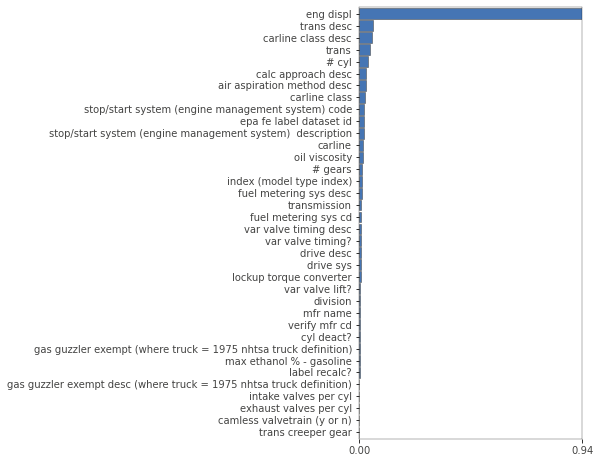

In [31]:
showimp(rf, X, y)

In [32]:
important_features= pd.DataFrame(importances(rf, X, y, features=X.columns)).sort_values(by=['Importance'], axis=0,ascending=False)
important_features=important_features[important_features['Importance']>=.001]
important_features

,Importance
Feature,
eng displ,0.938048
trans desc,0.054090
carline class desc,0.052417
# cyl,0.044326
trans,0.039377
air aspiration method desc,0.029483
stop/start system (engine management system) description,0.027170
calc approach desc,0.022671
stop/start system (engine management system) code,0.022180


In [33]:
impfeatures = ['eng displ','trans','carline class desc','trans desc','stop/start system (engine management system) code','# cyl','calc approach desc','carline class','air aspiration method desc','epa fe label dataset id','carline','# gears','oil viscosity','fuel metering sys cd','index (model type index)','var valve timing desc','fuel metering sys desc','transmission','drive sys','drive desc','lockup torque converter']

In [34]:
X=X[impfeatures]

In [35]:
oob_final2 = []
for i in range(10):
    rf = RandomForestRegressor(n_estimators=150, n_jobs=-1, oob_score=True)
    rf.fit(X, y)
    oob_final2.append(rf.oob_score_)
np.mean(oob_final2)

0.9455984020372163

In [36]:
df1['trans desc'].unique()

array(['semi-automatic', 'manual',
       'automated manual- selectable (e.g. automated manual with paddles)',
       'automatic', 'automated manual', 'continuously variable',
       'selectable continuously variable (e.g. cvt with paddles)'],
      dtype=object)

In [37]:
X['trans desc'] = df1['trans desc'].values`

In [38]:
#performing One Hot Encoding on column 
encoder = ce.OneHotEncoder(cols=['trans desc'])
encoder.fit(X)
X = encoder.transform(X)

In [39]:
oob_final2 = []
for i in range(10):
    rf = RandomForestRegressor(n_estimators=150, n_jobs=-1, oob_score=True)
    rf.fit(X, y)
    oob_final2.append(rf.oob_score_)
np.mean(oob_final2)

0.9452356983051933

In [40]:
#creating new feature
X['index (model type index) + carline'] = X['index (model type index)'] + X['carline']

In [41]:
oob_final2 = []
for i in range(10):
    rf = RandomForestRegressor(n_estimators=150, n_jobs=-1, oob_score=True)
    rf.fit(X, y)
    oob_final2.append(rf.oob_score_)
np.mean(oob_final2)

0.9458209839676279

### Part 6 - Create and evaluate a final model
 

In [42]:
oob_final2 = []

for i in range(10):
    rf = RandomForestRegressor(n_estimators=150, n_jobs=-1, oob_score=True)
    rf.fit(X, y)
    oob_final2.append(rf.oob_score_)

print("Out-of-bag scores: \n", oob_final2)
print("Average final oob score of 10 runs: ", np.mean(oob_final2))
Average_final2oob=np.mean(oob_final2)

Out-of-bag scores: 
 [0.9454812927528601, 0.9439284529652262, 0.9451528137256633, 0.944150715406321, 0.9452564348715149, 0.9446406488032161, 0.946646864508634, 0.9458137102658326, 0.9452348802845345, 0.9466818442977316]
Average final oob score of 10 runs:  0.9452987657881534


In [45]:
pdiff=(Average_final2oob-Average_final1_oob)/Average_final1_oob*100
#rounding off the result upto 2 decimal places.
percent_diff=round(pdiff,2)
percent_diff

-0.01

### Part 7 - How did you do?

**Question** What is the percent difference between the oob score of your best model and the baseline calculated in **Part 4**?

**Enter your answer here:**

**Question** What changes did you make to the data set of **Part 4** to get to the final data set used in **Part 6** and how much did each change increase the oob score that you calculated in **Part 4**? 

**Enter your answer here:**

| Change made | Change in oob score | 
| :- | :-: |  
|  example 1: create new feature 'index + carline'  | +0.0003    | 
|  example 2: one-hot encoded feature 'trans desc'  | +0.0002    | 